# Machine Learning with sci-kit

# Agenda

* Machine Learning pipeline review
* scikit Python Library
* Data representation
  * Feature Matrix
  * Target array
  * iris dataset example
* Estimator API
* Linear Regression
  * Simple Linear Regression
  * Model Evaluation
  * Polynomial Regression
* Selecting the Best Model
* The bias-variance trade-off
* Summary

# Libraries Import

First we need to import required libraries. More to the libraries later.

In [1]:
import filecmp
import oci
from oci.object_storage.models import CreateBucketDetails
import os
import pandas as pd
import io
from PIL import Image
from io import StringIO
import cx_Oracle

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn import preprocessing
sns.set()

# Object Storage

In [3]:
config = oci.config.from_file("/home/opc/.oci/config", "DEFAULT")

In [4]:
identity = oci.identity.IdentityClient(config)
user = identity.get_user(config["user"]).data
print(user)

{
  "capabilities": {
    "can_use_api_keys": true,
    "can_use_auth_tokens": true,
    "can_use_console_password": false,
    "can_use_customer_secret_keys": true,
    "can_use_smtp_credentials": true
  },
  "compartment_id": "ocid1.tenancy.oc1..aaaaaaaatx62bxouthg6dqnqfxzdpbumb3rcq5dl7fn7xpdmlfytdx3v7xqq",
  "defined_tags": {},
  "description": "sascha.hagedorn@oracle.com",
  "email": null,
  "external_identifier": "f3f18ed01af848f6a3223fb06e2e0d5e",
  "freeform_tags": {},
  "id": "ocid1.user.oc1..aaaaaaaaadnydxfkoixuwmv6h4uvscixrlpzhxqe6wc3rwbu7bmay2wr7rma",
  "identity_provider_id": "ocid1.saml2idp.oc1..aaaaaaaahezcofax6xncyhbzcbjynxtlh7cdsqkprzr64rkb4rqv5ip2je3q",
  "inactive_status": null,
  "is_mfa_activated": false,
  "lifecycle_state": "ACTIVE",
  "name": "oracleidentitycloudservice/sascha.hagedorn@oracle.com",
  "time_created": "2019-08-14T13:13:26.095000+00:00"
}


In [5]:
compartment_id = config["tenancy"]
print(compartment_id)
object_storage = oci.object_storage.ObjectStorageClient(config)
print(object_storage)
namespace = object_storage.get_namespace().data
print(namespace)

ocid1.tenancy.oc1..aaaaaaaatx62bxouthg6dqnqfxzdpbumb3rcq5dl7fn7xpdmlfytdx3v7xqq
sehubpilot


In [6]:
bucket_name = "machine_learning"
bucket = object_storage.get_bucket(namespace, bucket_name)

In [7]:
object_list = object_storage.list_objects(namespace, bucket_name)
for o in object_list.data.objects:
    print(o.name)

boston.csv


In [8]:
#object_name = "bag01.jpg"
object_name = "boston.csv"
#destination_dir = '/home/oracle/tmp'.format(object_name) 
get_obj = object_storage.get_object(namespace, bucket_name, object_name)
for chunktest in get_obj.data.raw.stream(1024 * 1024, decode_content=False):
    chunktest

In [9]:
print(type(chunktest))
chunktest

<class 'bytes'>


b',CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV\n0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0\n1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6\n2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7\n3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4\n4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.9,5.33,36.2\n5,0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7\n6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.6,12.43,22.9\n7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.9,19.15,27.1\n8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5\n9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.1,18.9\n10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0\n11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,

In [11]:
s=str(chunktest,'utf-8')
data = StringIO(s)
type(data)
contents = data.getvalue()
contents

',CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV\n0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0\n1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6\n2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7\n3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4\n4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.9,5.33,36.2\n5,0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7\n6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.6,12.43,22.9\n7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.9,19.15,27.1\n8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5\n9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.1,18.9\n10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0\n11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5

In [13]:
df=pd.read_csv(data)

EmptyDataError: No columns to parse from file

In [15]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# cx_Oracle

In [2]:
os.environ['PATH']

'/home/opc/anaconda3/envs/tf-cpu/bin:/home/opc/anaconda3/condabin:/opt/oracle/sqlcl/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/usr/lib/oracle/18.5/client64/bin:/opt/graalvm/graalvm-ee-19.0.0/bin:/home/opc/.local/bin:/home/opc/bin'

In [5]:
os.environ['TNS_ADMIN'] = "/home/opc/TNS_ADMIN"
os.environ['TNS_ADMIN']

'/home/opc/TNS_ADMIN'

In [2]:
connection = cx_Oracle.connect('oco', 'WElcome_123#', 'adwoco_high')

In [4]:
df = pd.read_sql('select * from boston', con=connection)

In [5]:
df

,NULL_COLUMN_1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Machine Learning Pipeline


<img src="CRISP-DM_Process_Diagram.png" alt="Drawing" style="width: 400px;"/>


Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation and Deployment.

**Business Understanding** consists of the translation of the business objectives and
requirements into a data mining approach. **Data Understanding**  ranges from data
collection to the examination of the data quality, this step is very much linked to the
Business Understanding because it is important to have a clear understanding of the
data to translate the business objectives and requirements. In the phase of the **Data
Preparation** it is required to process the data for the model. This phase has multiple
iterations. The **modeling** consists of the application of various techniques to make sure
that the best one can be picked out of a comprehensive number of options. **Deployment**
is the last step and makes sure that the appropriate model is being implemented into
the system and that the user is able to conduct the analysis on his own.

# scikit-learn Python Library

There are several Python libraries which provide machine learning algorithms implementation but [scikit-learn](http://scikit-learn.org) is the most popular one.

Some advantages of this library:
* provides efficient implementations of a large number of common algorithms
* clean and uniform API which allows you to easily swap algorithms since they have the same interface
* very good documentation and samples/tutorials
* built on numpy/scipy/matplotlib
* open source, commercially usable!

![](https://i1.wp.com/blog.kaggle.com/wp-content/uploads/2015/04/drop_shadows_background2.png)

## Data representation

scikit-learn takes as input tables of data (`numpy.ndarray`).

A basic table is a two-dimensional grid of data, where each row represents individual samples (elements) of the dataset, and the columns represent the features of the samples.

The number of rows is equivalent to the number of samples (`n_samples`), while the number of columns represents the number of features (`n_features`).

**Feature Matrix**

The matrix that contains the features of the samples is called *features matrix*.
By convention, this matrix is often reffered to as a variable named `X`, is two-dimensional, with shape `(n_samples, n_features)`.
The type of `X` is usually a `numpy.ndarray` or a Pandas `DataFrame`.

The samples (rows) always refer to the individual objects described by the dataset. For example, a sample might be a person, document, a video, anything that you can describe with a set of values.

The features (columns) always refer to observations that describe each sample. Features are generally real-valued, by may be boolean, or discrete valued (either numerical or even strings).


**Target array**

When working with Supervised Learning, besides our feature matrix ``X``, we have a *label*/*target* array, which by convention we will call `y`.
This array is usually one dimensional, length ``n_samples``.
The type of `y` is either a `numpy.ndarray` or Pandas ``Series``.

There are estimators that can handle multiple target values in the form of a two-dimensional ``[n_samples, n_targets]`` target array.

Remember, the target array is the quantity we want to eventually predict with our model.

### Summary

The expected layout for both `X` and `y` is the following:

![](figures/scikit-learn-feature-target-array.png)

# Data Understanding

Before we can jump into modelling, it is always necessary to understand the data. 

In [5]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

Let's look at the first five rows and the data types of the data to get a better understanding. Use the `dtypes` module to print the data types and the `head()` module to show the first 5 rows.

In [142]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [131]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


It is always recommended to check for missing values.

If one column / feature has missing values, you have two options: deleting or filling in the values. 

If a feature has just a few missing values, it might be fine to simply delete the rows from the data. 

However, if the number is quite high, it is recommended to fill in the missing values (or in specific cases even not take the given feature into account)

Filling in the missing values is called Imputation. There are a variety of methods to fill in the gaps, such as taking the median or mean for a given numeric feature.

![](1*_RA3mCS30Pr0vUxbp25Yxw.png)

`isnull()` checks the columns for missing values. With `sum()` we can sum those missing values up. Combine those two modules.  

In [22]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

It seems we do not have any missing values. 

Another good practice is to use the describe function on the numeric values of the dataset. 

It computes counts, means, standard deviations, minimum, maximum and quantiles.

This method is good, because it gives you an overview of the value ranges, which show if some features have unusal outliers. 

It also shows if some features have a dummy variable (f.e. -99 or -999), which sometimes are used for missing values.

Apply the `describe()` module. 

In [24]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


You can also plot boxplots to investigate further.

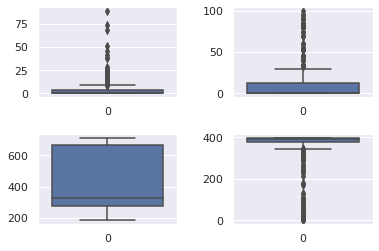

In [49]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.boxplot(data = boston['CRIM'], ax=ax)
ax = fig.add_subplot(2, 2, 2)
sns.boxplot(data = boston['ZN'], ax=ax)
ax = fig.add_subplot(2, 2, 3)
sns.boxplot(data = boston['TAX'], ax=ax)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = fig.add_subplot(2, 2, 4)
sns.boxplot(data = boston['B'], ax=ax)
plt.show()

**Normalization**

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll only want to normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method were using to normalize here is called the Box-Cox Transformation. 

**Scaling**

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points, like support vector machines, or SVM or k-nearest neighbors, or KNN. With these algorithms, a change of "1" in any numeric feature is given the same importance.

For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! This clearly doesn't fit with our intuitions of the world. With currency, you can convert between currencies. But what about if you're looking at something like height and weight? It's not entirely clear how many pounds should equal one inch (or how many kilograms should equal one meter).

By scaling your variables, you can help compare different variables on equal footing. To help solidify what scaling looks like, let's look at a made-up example. (Don't worry, we'll work with real data in just a second, this is just to help illustrate my point.)

In [133]:
normalized_boston = pd.DataFrame(preprocessing.normalize(boston), columns= boston.columns)

Let's have a look again after the normalization. Apply `head()` to the new dataset.  

In [134]:
normalized_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000013,0.035997,0.004620,0.0,0.001076,0.013149,0.130388,0.008179,0.002000,0.591945,0.030597,0.793727,0.009959
1,0.000058,0.000000,0.014977,0.0,0.000994,0.013602,0.167140,0.010522,0.004237,0.512648,0.037707,0.840785,0.019362
2,0.000059,0.000000,0.015174,0.0,0.001007,0.015421,0.131140,0.010661,0.004293,0.519409,0.038204,0.843138,0.008650
3,0.000071,0.000000,0.004785,0.0,0.001005,0.015360,0.100527,0.013306,0.006585,0.487268,0.041045,0.866174,0.006453
4,0.000151,0.000000,0.004755,0.0,0.000999,0.015587,0.118209,0.013222,0.006543,0.484177,0.040784,0.865631,0.011625


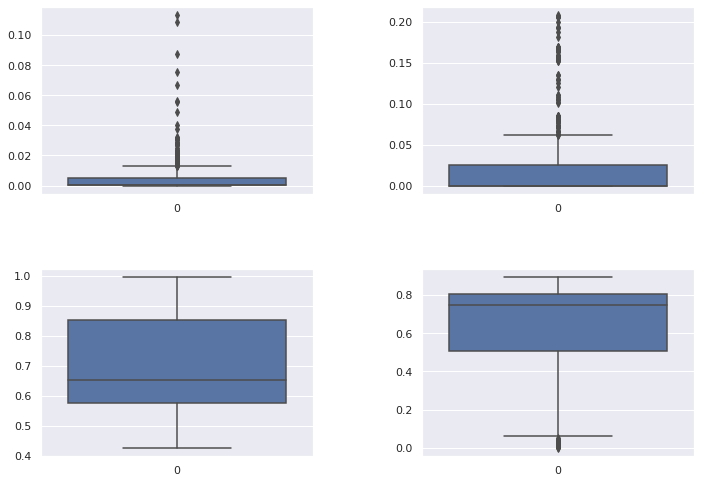

In [135]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.boxplot(data = normalized_boston['CRIM'], ax=ax)
ax = fig.add_subplot(2, 2, 2)
sns.boxplot(data = normalized_boston['ZN'], ax=ax)
ax = fig.add_subplot(2, 2, 3)
sns.boxplot(data = normalized_boston['TAX'], ax=ax)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = fig.add_subplot(2, 2, 4)
sns.boxplot(data = normalized_boston['B'], ax=ax)
plt.show()

Let's standardize the data (here called scaling).

In [137]:
scaled_boston = pd.DataFrame(preprocessing.scale(boston), columns= boston.columns)

Have a look at the data.

In [138]:
scaled_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


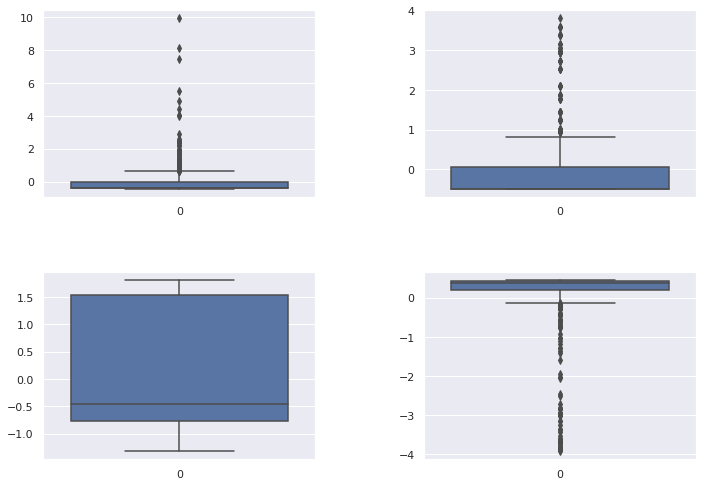

In [139]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.boxplot(data = scaled_boston['CRIM'], ax=ax)
ax = fig.add_subplot(2, 2, 2)
sns.boxplot(data = scaled_boston['ZN'], ax=ax)
ax = fig.add_subplot(2, 2, 3)
sns.boxplot(data = scaled_boston['TAX'], ax=ax)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = fig.add_subplot(2, 2, 4)
sns.boxplot(data = scaled_boston['B'], ax=ax)
plt.show()

You might have noticed that we only worked with the features. We also need to add the target variable.

In [ ]:
boston['MEDV'] = boston_dataset.target

Apply the same logic to our scaled features. 

In [158]:
scaled_boston['MEDV'] = boston_dataset.target
normalized_boston['MEDV'] = boston_dataset.target

Let's have a look at the distribution. 

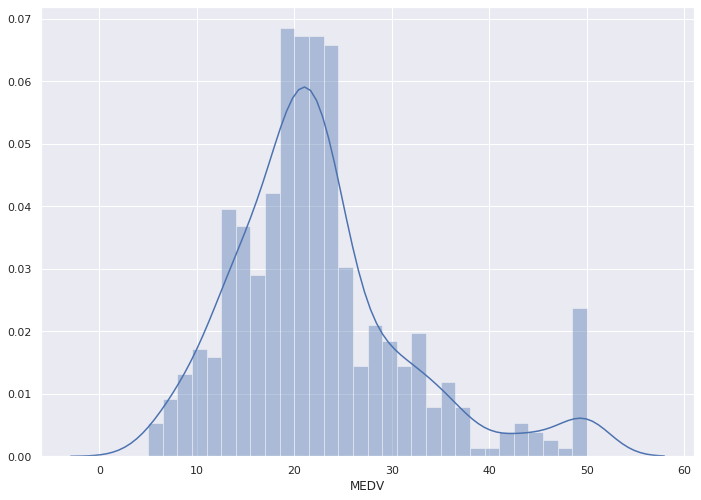

In [143]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

One way to already look into relevant features which might have an influence on the target is the correlation matrix. 

The correlation matrix gives you the corrlation coefficients between two features. 

The coefficient ranges from -1 to 1. See a rule of thumb below.

![](guideline-for-interpreting-correlation-coefficient-2-638.jpg)

**Causation vs. Correlation**

Even though those correlation coefficients might be an indicator for the target variable, but it can also just be a correlation effect without any causation.

Again, correlation describes a situation where two values increase in the same or opposite direction (simultaneously). But this does not mean the one is the cause for the increase / decrease of the other.  

![](correlation-vs-causation-phone-RAM1-1024x574.png)

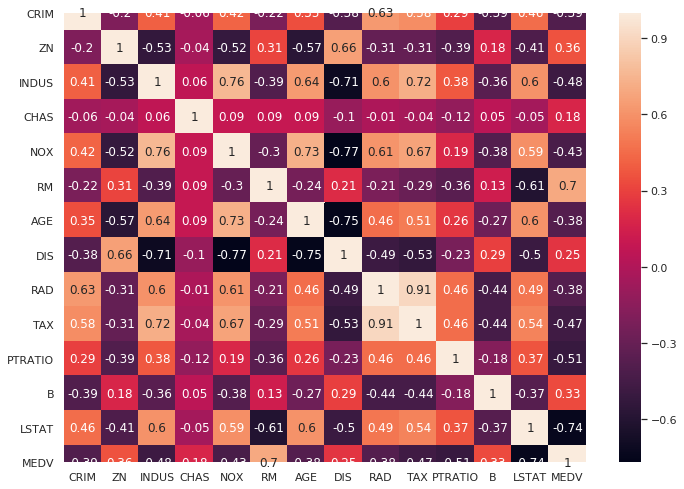

In [144]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

We can see that LSTAT and MEDV are strongly negative correlated and RM strongly positive correlated. Let's have a closer look. 

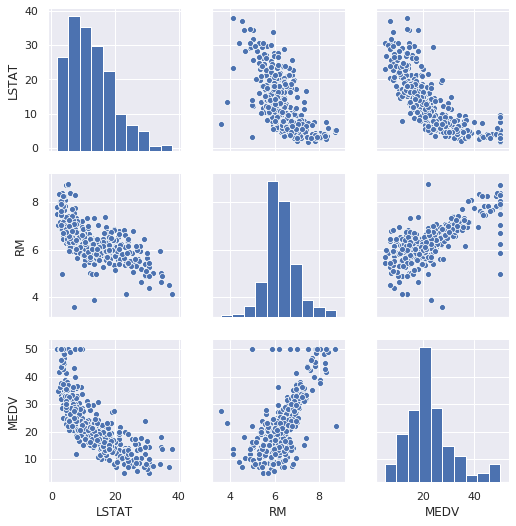

In [152]:
new_boston = boston[['LSTAT', 'RM', 'MEDV']]
sns.pairplot(new_boston)

The scatter plots confirm the correlations. The pairplot module gives us scatter plots for two different features and the distribution plot for itself. 

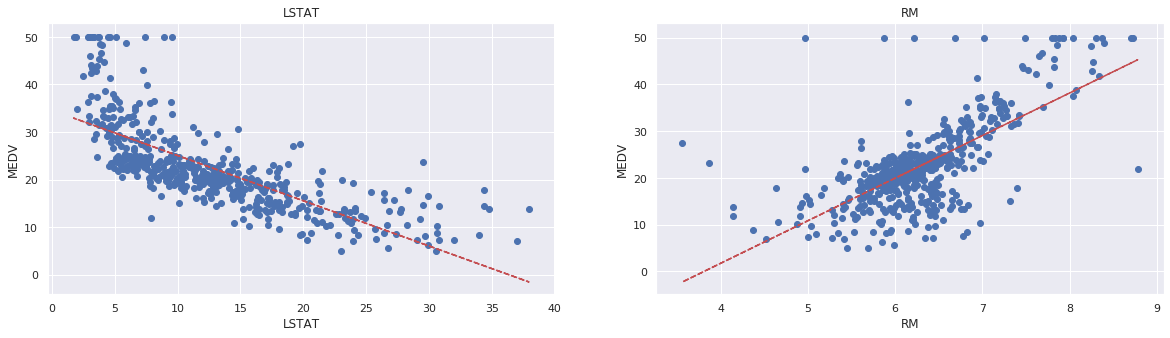

In [153]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Let's move on in our Machine Learning Pipeline. For now let's only use LSTAT and RM as a feature and see what happens. 

## Modeling

In [146]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

We need to split the data into training and testing sets. 

![](grid_search_cross_validation.png)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

NameError: name 'X' is not defined

First, we need to define the model. In our case a linear regression model. Afterwards, the model has to be fitted or also called trained. Try this on your own. Use the `fit()` module and pass the `X_train` and `Y_train` arguments along. 

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()

NameError: name 'X_train' is not defined

In [7]:
print("Unhide me")
lin_model.fit(X_train, Y_train)

Unhide me


Once the model is trained, we can make predictions. We will do this on the training set and the testing set to have a comparison. Use `lin_model` with `predict()` and `X_train` as well as `X_test`. 

`y_train_predict =`  
`y_test_predict =`

In [ ]:
y_train_predict = lin_model.predict(X_train)
y_test_predict = lin_model.predict(X_test)

## Evaluation

Now let's have a look at two different metrics to evaluate the performance.

We calcualte the Root Mean Square Error and the R Squared Score.

The Root Mean Square Error (RMSE) bascally describes how good the model "fits" into (predicts) the real values (on average). 

![](regression3a-1.png)

This picture shows a linear regression model. The RMSE is calculated based on the distance from the model to the real values as demonstrated in the picture above. 

The (R-squared) , (also called the coefficient of determination), which is the proportion of variance (%) in the dependent variable that can be explained by the independent variable. Hence, as a rule of thumb for interpreting the strength of a relationship based on its R-squared value (use the absolute value of the R-squared value to make all values positive):

- if  R-squared value < 0.3 this value is generally considered a None or Very weak effect size,
- if R-squared value 0.3 < r < 0.5 this value is generally considered a weak or low effect size,
- if R-squared value 0.5 < r < 0.7 this value is generally considered a Moderate effect size,
- if R-squared value r > 0.7 this value is generally considered strong effect size,

The R-square is usually between 0 and 1. However, RMSE does not have a certain interval. 

RMSE is harder to interpret, because it is a relative measure. The general rule is to keep it as small as possible. A good practice is to compare RMSE values of different models, splits etc.

In [149]:
# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


Score in the testing set is better.

This concludes our first exercise. 

# Normalized

In [159]:
X = pd.DataFrame(np.c_[normalized_boston['LSTAT'], normalized_boston['RM']], columns = ['LSTAT','RM'])
Y = normalized_boston['MEDV']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

(404, 2)
(102, 2)
(404,)
(102,)
The model performance for training set
--------------------------------------
RMSE is 5.7068240629336575
R2 score is 0.6208708115448042


The model performance for testing set
--------------------------------------
RMSE is 4.945953398990404
R2 score is 0.6875559296046472


Score with the testing is better. 

# Scaled

In [160]:
X = pd.DataFrame(np.c_[scaled_boston['LSTAT'], scaled_boston['RM']], columns = ['LSTAT','RM'])
Y = scaled_boston['MEDV']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

(404, 2)
(102, 2)
(404,)
(102,)
The model performance for training set
--------------------------------------
RMSE is 5.637129335071195
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702912
R2 score is 0.6628996975186952


The score on the testing set is better that on the training set which is desired, because we do not overfit.